### Create confusion matrix

In [12]:
from os import listdir, makedirs
from os.path import isfile, join, exists
import pandas as pd
import numpy as np
from itertools import product
###############################################################################################
path = r'/media/karim/Datas4To/1_Analyses_Intra_EM_Odor/Olfacto/'
path_df = join(path,'Bilan_classif/2_signif_elecs_patients/')
path2save = join(path,'Bilan_classif/3_Figures/')
###############################################################################################

freqs = ['2_theta']#['1_delta','2_theta','3_alpha','4_beta','5_gamma1','6_gamma2']#
option = '75' #'all'
classif = 'obj'

if classif == 'all':
    conds = {'0':['good','bad',4,5],'1':['poor','partial',4,5],'2':['partial','detailed',3,4],
     '3':['poor','detailed',3,4]}
if classif == 'obj':
    conds = {'1':['poor','partial',4,5],'2':['partial','detailed',3,4],
     '3':['poor','detailed',3,4]}

#Create the list of rois to create the global matrix
roi60, roi75 = np.array([]), np.array([])

if option =='75':
    for cond in conds:
        for freq in freqs:
            filename75 = path_df+cond+'_Classif_'+conds[cond][0]+'_'+conds[cond][1]+'_'+freq+'_win3_patients'+str(conds[cond][3])+'.csv'
            if isfile(filename75):
                df75 = pd.read_csv(filename75)
                roi75 = np.hstack((roi75,df75['s_aal'].values)) if np.size(roi75) else df75['s_aal'].values
    roi_all = np.unique(roi75)
    
if option =='all':
    for cond in conds:
        for freq in freqs:
            filename60 = path_df+cond+'_Classif_'+conds[cond][0]+'_'+conds[cond][1]+'_'+freq+'_win3_patients'+str(conds[cond][2])+'.csv'
            filename75 = path_df+cond+'_Classif_'+conds[cond][0]+'_'+conds[cond][1]+'_'+freq+'_win3_patients'+str(conds[cond][3])+'.csv'
        if isfile(filename60):
            df60 = pd.read_csv(filename60)
            roi60 = np.hstack((roi60,df60['s_aal'].values)) if np.size(roi60) else df60['s_aal'].values
        if isfile(filename75):
            df75 = pd.read_csv(filename75)
            roi75 = np.hstack((roi75,df75['s_aal'].values)) if np.size(roi75) else df75['s_aal'].values
    roi60, roi75 = np.unique(roi60), np.unique(roi75)
    roi60 = np.delete(roi60,np.where(roi60=='Not f'),axis=0)
    roi75 = np.delete(roi75,np.where(roi75=='Not f'),axis=0)
    roi_all = np.unique(np.concatenate((roi60,roi75), axis=0))
print(option,roi_all.shape)

75 (0,)


In [20]:
from os import listdir, makedirs
from os.path import isfile, join, exists
import pandas as pd
import numpy as np
from itertools import product
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter, MaxNLocator
from scipy import stats

###############################################################################################
path = r'/media/karim/Datas4To/1_Analyses_Intra_EM_Odor/Olfacto/'
path_df = join(path,'Bilan_classif/2_signif_elecs_patients_phase/')
path2save = join(path,'Bilan_classif/3_Figures_Phase/')
###############################################################################################

freqs = {'2_theta':'win1'}#['1_delta','2_theta','3_alpha','4_beta','5_gamma1','6_gamma2']#
conds = {'1':['poor','partial',2],'2':['partial','detailed',2],
     '3':['poor','detailed',2]}
feats = ['da','pow_change','time']

#Create the list of rois to create the global matrix
freq = '2_theta'
roi_freq = []
for cond in conds:
    filename = path_df+cond+'_Classif_'+conds[cond][0]+'_'+conds[cond][1]+'_'+freq+'_'+freqs[freq]+'_patients'+str(conds[cond][2])+'.csv'
    df = pd.read_csv(filename)
    rois = df['s_aal_RL'].values
    rois = np.unique(rois)
    rois = np.delete(rois,np.where(rois=='Not found'), axis=0)
    rois = np.delete(rois,np.where(rois=='Not f'), axis=0)
    roi_freq.append(np.array(rois))
    print(freq,cond,roi_freq,)
roi_all = np.intersect1d(roi_freq[0],roi_freq[1])
roi_all = np.intersect1d(roi_all,roi_freq[2])
print(roi_all)

2_theta 2 [array(['Frontal Inf Orb', 'Frontal Mid', 'Frontal Mid Orb', 'Frontal Sup',
       'Hippocampus', 'Insula', 'Temporal Mid', 'Temporal Sup'], dtype=object)]
2_theta 3 [array(['Frontal Inf Orb', 'Frontal Mid', 'Frontal Mid Orb', 'Frontal Sup',
       'Hippocampus', 'Insula', 'Temporal Mid', 'Temporal Sup'], dtype=object), array(['Fusiform', 'Hippocampus', 'Supp Motor Area', 'Temporal Mid',
       'Temporal Sup'], dtype=object)]
2_theta 1 [array(['Frontal Inf Orb', 'Frontal Mid', 'Frontal Mid Orb', 'Frontal Sup',
       'Hippocampus', 'Insula', 'Temporal Mid', 'Temporal Sup'], dtype=object), array(['Fusiform', 'Hippocampus', 'Supp Motor Area', 'Temporal Mid',
       'Temporal Sup'], dtype=object), array(['Cingulum Ant', 'Frontal Inf Orb', 'Frontal Mid', 'Frontal Mid Orb',
       'Frontal Sup', 'Frontal Sup Medial', 'Fusiform', 'Heschl',
       'Hippocampus', 'Postcentral', 'Supp Motor Area', 'SupraMarginal',
       'Temporal Inf', 'Temporal Mid', 'Temporal Sup'], dtype=object)]


### Create the ROI matrix // nb of patients

In [21]:
#Create the matrix
big_matrix = np.array([])
x_freq, x_cond = [], []
groupby = 'cond'

for cond in (sorted(conds)): #trick to impose iteration order for conds & freqs
    print(freq, conds[cond][:2])
    x_freq.append(freq[2:].capitalize())
    x_cond.append(conds[cond][0][:2].capitalize()+'/'+conds[cond][1][:2].capitalize())
    filename75 = path_df+cond+'_Classif_'+conds[cond][0]+'_'+conds[cond][1]+'_'+freq+'_win1_patients'+str(conds[cond][2])+'.csv'
    sig75, sig = None, np.array([])
    if isfile(filename75):
        sig75 = pd.read_csv(filename75)['s_aal_RL'].values
        for roi in roi_all:
            if roi in sig75:
                sig = np.hstack((sig,75)) if np.size(sig) else 75
            if roi not in sig75 and roi in sig60:
                sig = np.hstack((sig,60)) if np.size(sig) else 60
            if roi not in sig75 and roi not in sig60:
                sig = np.hstack((sig,0)) if np.size(sig) else 0
    if sig75 is None:
        for roi in roi_all:
            if roi in sig60:
                sig = np.hstack((sig,60)) if np.size(sig) else 60
            else:
                sig = np.hstack((sig,0)) if np.size(sig) else 0
    big_matrix = np.vstack((big_matrix,sig)) if np.size(big_matrix) else sig
big_matrix = big_matrix.T
_, idx = np.unique(x_cond,return_index=True) #to keep order
x_cond = [x_cond[i] for i in sorted(idx)]
print('big mama',big_matrix.shape, x_freq, x_cond,big_matrix)

# Create mask of positions in x (with float datatype) where NaNs are to be put
big_matrix = big_matrix.astype(np.float32)
# big_matrix = big_matrix[big_matrix==0] = np.nan
for i, j in product(range(big_matrix.shape[0]), range(big_matrix.shape[1])):
    if big_matrix[i,j] == 0:
        big_matrix[i,j] = np.nan
print(big_matrix)
   

2_theta ['poor', 'partial']
2_theta ['partial', 'detailed']
2_theta ['poor', 'detailed']
big mama (3, 3) ['Theta', 'Theta', 'Theta'] ['Po/Pa', 'Pa/De', 'Po/De'] [[75 75 75]
 [75 75 75]
 [75 75 75]]
[[ 75.  75.  75.]
 [ 75.  75.  75.]
 [ 75.  75.  75.]]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Confusion matrix, without normalization


/media/karim/Datas4To/1_Analyses_Intra_EM_Odor/3_BrainpipeScripts/1_Intra_scripts/confusion_matrix.py:22: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax1.set_axis_bgcolor("silver")


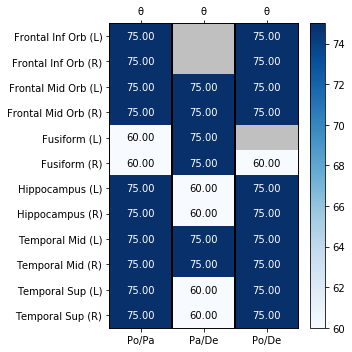

In [32]:
import matplotlib.pyplot as plt
from confusion_matrix import plot_confusion_matrix
%load_ext autoreload
%autoreload 2

freqnames = ['θ']#,'θ','γ2']
codes = ['roi',plt.cm.Blues,1]

groups = len(np.unique(x_cond))
nconds = len(np.unique(x_cond))
plot_confusion_matrix(big_matrix, xtickslabels1=freqnames*groups, xtickslabels2=x_cond, 
    ytickslabels=roi_all,cmap=codes[1], ylabel='Regions',size=(5,5),cbsides=codes[2])
plot_name = path2save+'Matrix_recap_'+codes[0]+'_'+freqnames[0]+'_by_'+groupby+'_'+str(nconds)+'conds_rois'+option+'.png'
plt.savefig(plot_name, dpi=300, bbox_inches='tight')
plt.show()

### FEATURE MATRIX
    Power, DA, Time

In [22]:
#Create the boolean matrix to show only regions sig in at least 60% of patients
da_mat, phase_diff, time_mat = np.array([]),np.array([]),np.array([])
x_freq, x_cond = [], []
feats = ['da','time','phase_diff']
groupby = 'cond'

for cond in (sorted(conds)): #trick to impose iteration order for conds & freqs
    x_cond.append(conds[cond][0][:2].capitalize()+'/'+conds[cond][1][:2].capitalize())
    filename60 = path_df+cond+'_Classif_'+conds[cond][0]+'_'+conds[cond][1]+'_'+freq+'_win1_patients'+str(conds[cond][2])+'.csv'
    sig60, data = pd.read_csv(filename60), np.array([])
    sig60['phase_diff']= sig60['std1']/sig60['std0']
    gr = sig60.groupby(['s_aal_RL','su_codes'])
    sel = gr[feats].agg(('max','mean'))
    da, time, rel_change = np.array([]), np.array([]), np.array([])
    for roi in roi_all:
        df_roi = sel[sel.index.get_level_values(0)==roi]
        da_val = df_roi.filter(like='da').filter(like='max').mean().values
        time_val = df_roi.filter(like='time').filter(like='mean').mean().values
        std_mean = df_roi.filter(like='phase_diff').filter(like='mean').mean().values
        
        da = np.hstack((da,da_val)) if np.size(da) else da_val
        time = np.hstack((time,time_val)) if np.size(time) else time_val
        rel_change = np.hstack((rel_change,std_mean)) if np.size(rel_change) else std_mean
        #print('vector',len(da),len(time),len(rel_change))
    da_mat = np.vstack((da_mat,da)) if np.size(da_mat) else da
    time_mat = np.vstack((time_mat,time)) if np.size(time_mat) else time
    phase_diff = np.vstack((phase_diff,rel_change)) if np.size(phase_diff) else rel_change
    #print('vector',len(da_mat),len(time_mat),len(pow_mat))
da_mat,time_mat, phase_diff = da_mat.T, time_mat.T, phase_diff.T
_, idx = np.unique(x_cond,return_index=True) #to keep order
x_cond = [x_cond[i] for i in sorted(idx)]
print(da_mat.shape, time_mat.shape, phase_diff.shape)

(3, 3) (3, 3) (3, 3)


### Plot the confusion matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0 3
3 ['Po/Pa', 'Pa/De', 'Po/De'] 0.743578630218
Confusion matrix, without normalization


/media/karim/Datas4To/1_Analyses_Intra_EM_Odor/3_BrainpipeScripts/1_Intra_scripts/confusion_matrix.py:22: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax1.set_axis_bgcolor("silver")


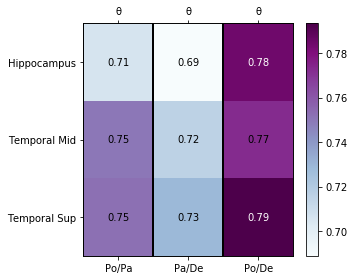

1 3
3 ['Po/Pa', 'Pa/De', 'Po/De'] 2.3867265005
Confusion matrix, without normalization


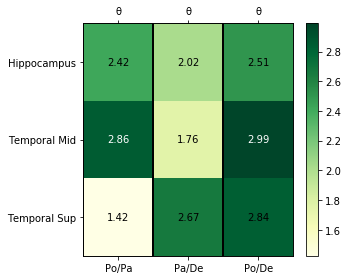

2 3
3 ['Po/Pa', 'Pa/De', 'Po/De'] 0.947922010769
Confusion matrix, without normalization


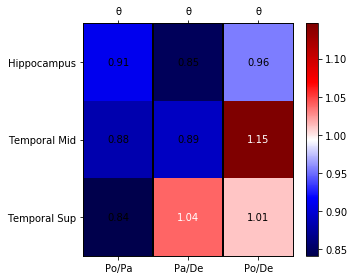

In [35]:
import matplotlib.pyplot as plt
from confusion_matrix import plot_confusion_matrix
%load_ext autoreload
%autoreload 2

freqnames = ['θ']#,'θ','γ2']
codes = {0:['da',plt.cm.BuPu,1],
         1:['time',plt.cm.YlGn,1],
         2:['phase_diff',plt.cm.seismic,1]}
feats_mat = [da_mat, time_mat, phase_diff]

# Plot non-normalized confusion matrix
for i,mat in enumerate(feats_mat):
    print(i, len(mat))
    groups = len(np.unique(x_cond))
    print(groups, x_cond, np.mean(mat))
    nconds = len(np.unique(x_cond))
    plot_confusion_matrix(mat, xtickslabels1=freqnames*groups, xtickslabels2=x_cond, 
        ytickslabels=roi_all,cmap=codes[i][1], ylabel='Regions',size=(5,4),cbsides=codes[i][2])
    plot_name = path2save+'Matrix_recap_theta_'+codes[i][0]+'_by_'+groupby+'_'+str(nconds)+'conds_rois'+option+'.png'
    plt.savefig(plot_name, dpi=300, bbox_inches='tight')
    plt.show()